In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'shubhranil29'

In [3]:
data = pd.read_csv(f'./shubhranil/txt/{filename}.txt')

In [4]:
accel = data[['raw_ax', 'raw_ay', 'raw_az']].values
gyro = data[['raw_gx', 'raw_gy', 'raw_gz']].values

In [5]:
from scipy.signal import butter, filtfilt

def lowpass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data

# Sample rate (Hz) and cutoff frequency (e.g., 5 Hz for slow movements)
fs = 1000  # Adjust based on your sampling rate
cutoff = 5
accel_filtered = lowpass_filter(accel, cutoff, fs)
gyro_filtered = lowpass_filter(gyro, cutoff, fs)

In [6]:
window_size = 5  # Adjust based on noise level
accel_smooth = pd.DataFrame(accel).rolling(window=window_size, center=True, min_periods=1).mean().values

In [7]:
window_size = 5  # Adjust based on noise level
gyro_smooth = pd.DataFrame(gyro).rolling(window=window_size, center=True, min_periods=1).mean().values

In [8]:
gravity = np.mean(accel_filtered[:, 2])  # Assuming z-axis is vertical
accel_dynamic = accel_filtered.copy()
accel_dynamic[:, 2] -= gravity  # Subtract gravity from the vertical axis

In [9]:
from scipy.signal import savgol_filter
window = 15  # Must be odd
poly_order = 3
accel_smoothed = savgol_filter(accel_filtered, window, poly_order, axis=0)

In [10]:
from scipy.signal import savgol_filter
window = 15  # Must be odd
poly_order = 3
gyro_smoothed = savgol_filter(gyro_filtered, window, poly_order, axis=0)

In [11]:
signals_acc = [
    ('accel', accel, 'tab:blue'),
    ('accel_filtered', accel_filtered, 'tab:orange'),
    ('accel_smooth', accel_smooth, 'tab:green'),
    ('accel_dynamic', accel_dynamic, 'tab:red'),
    ('accel_smoothed', accel_smoothed, 'tab:purple')
]

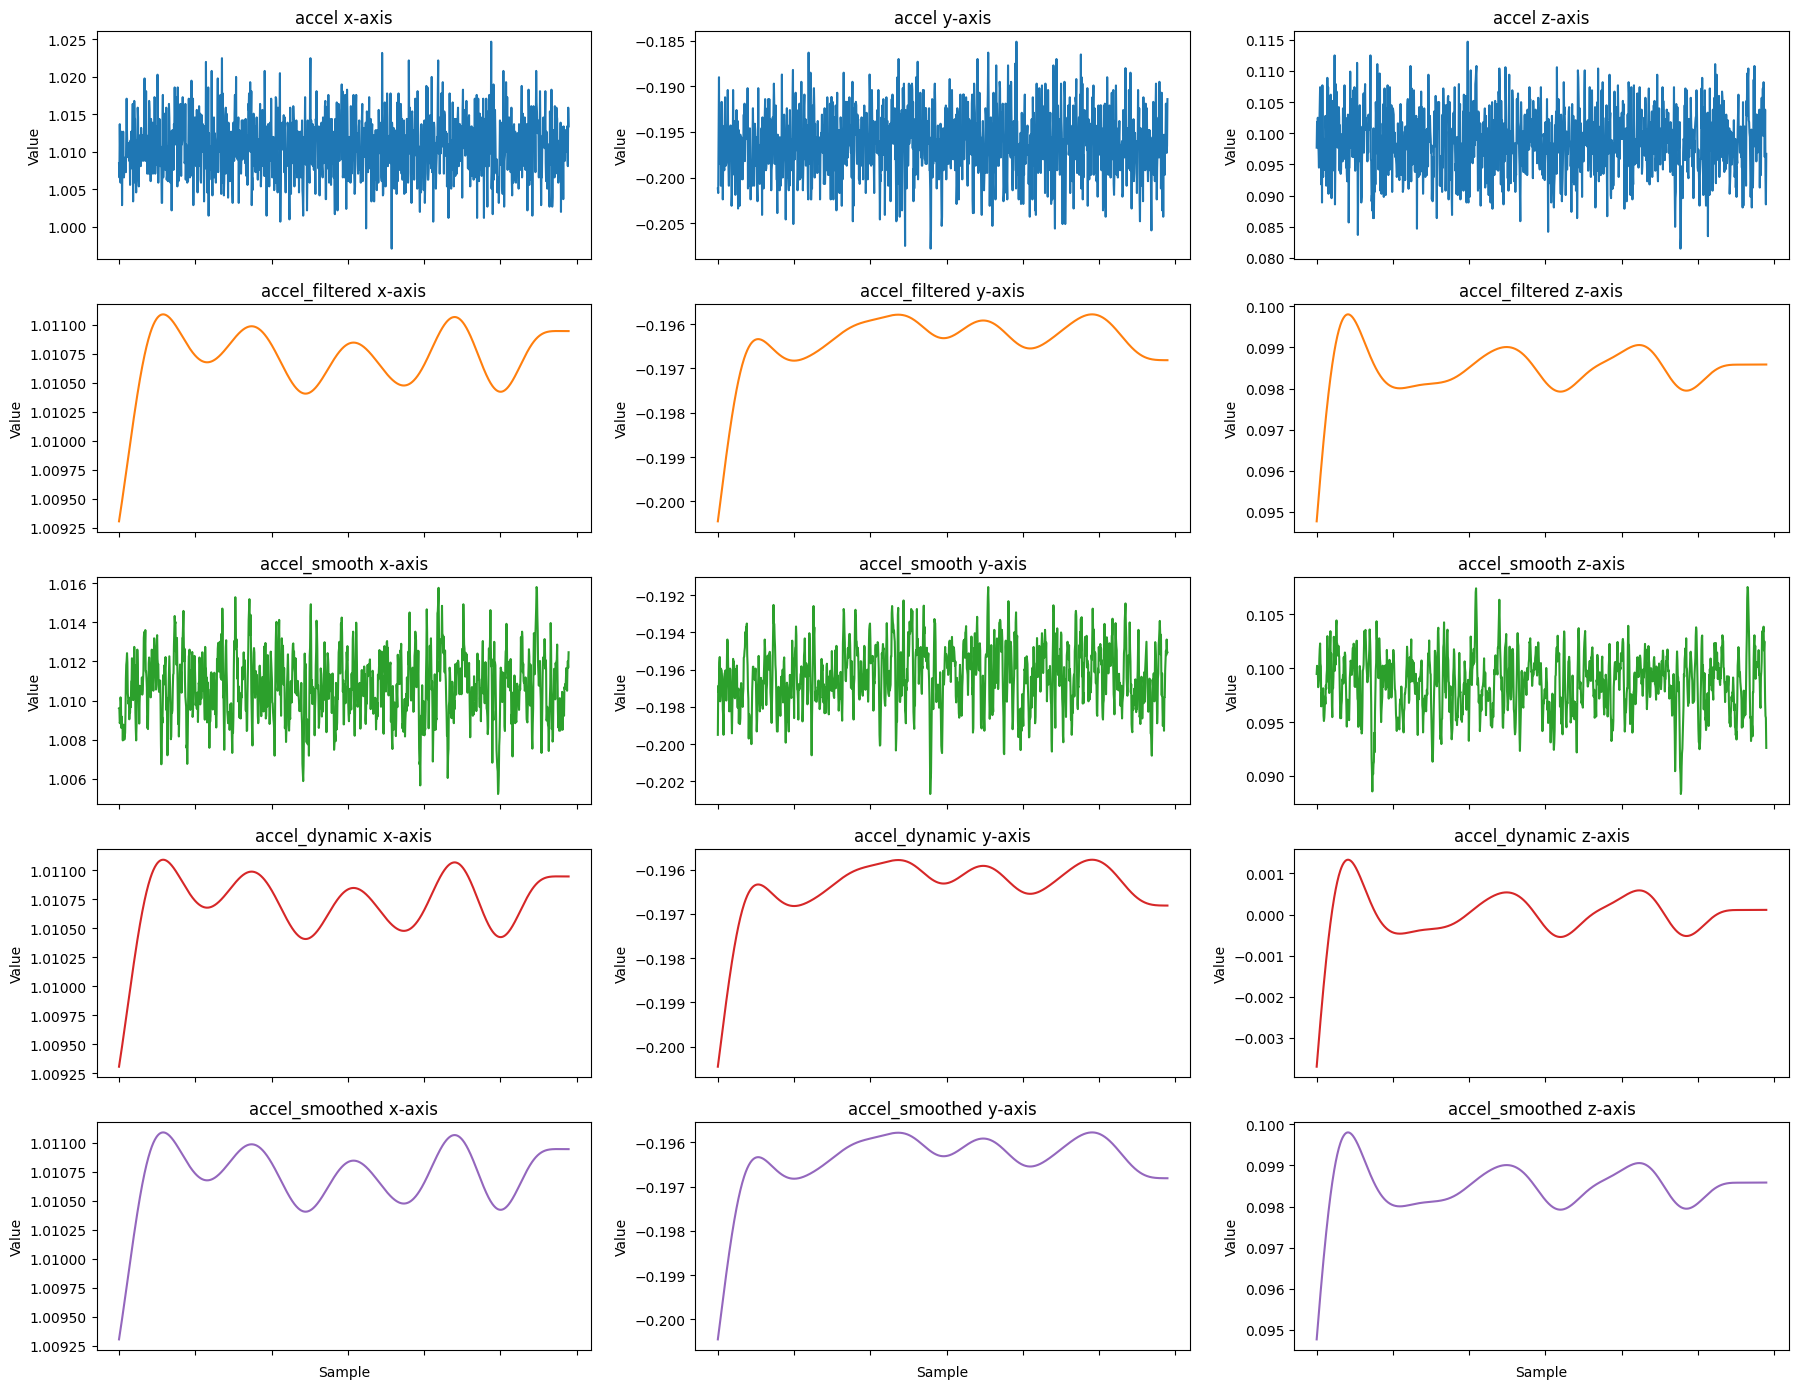

In [12]:
fig, axs = plt.subplots(5, 3, figsize=(18, 14), sharex=True)
axes_labels = ['x', 'y', 'z']

for row, (label, arr, color) in enumerate(signals_acc):
    for col, axx in enumerate(axes_labels):
        axs[row, col].plot(arr[:, col], color=color)
        axs[row, col].set_title(f"{label} {axx}-axis")
        axs[row, col].set_ylabel('Value')
        if row < 4:
            axs[row, col].set_xticklabels([])
        if row == 4:
            axs[row, col].set_xlabel('Sample')

plt.tight_layout()
plt.show()


In [13]:
signals_gyro = [
    ('gyro', gyro, 'tab:blue'),
    ('gyro_filtered', gyro_filtered, 'tab:orange'),
    ('gyro_smooth', gyro_smooth, 'tab:green'),
    ('gyro_smoothed', gyro_smoothed, 'tab:purple')
]

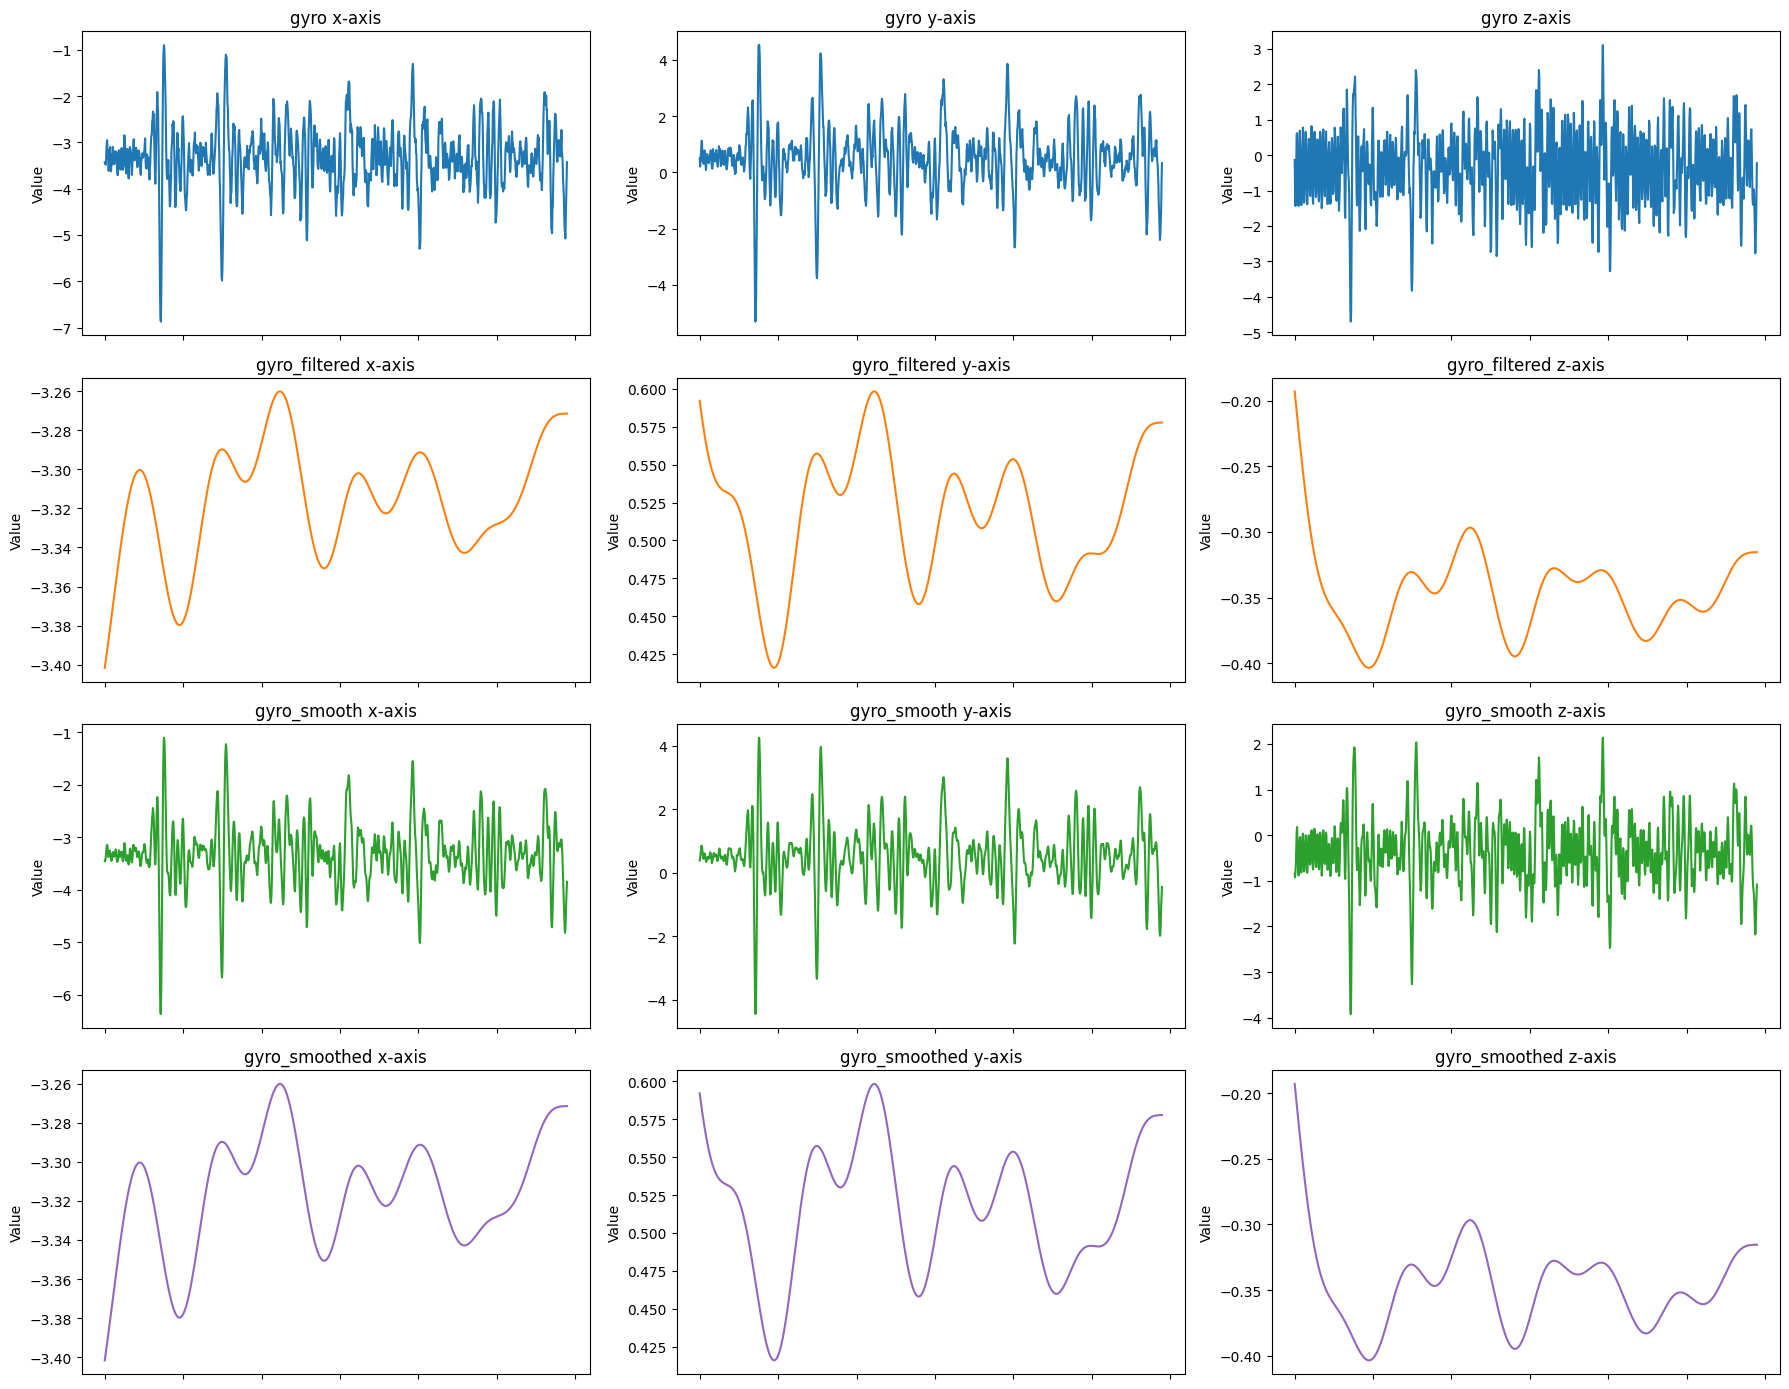

In [14]:
fig, axs = plt.subplots(4, 3, figsize=(18, 14), sharex=True)
axes_labels = ['x', 'y', 'z']

for row, (label, arr, color) in enumerate(signals_gyro):
    for col, axx in enumerate(axes_labels):
        axs[row, col].plot(arr[:, col], color=color)
        axs[row, col].set_title(f"{label} {axx}-axis")
        axs[row, col].set_ylabel('Value')
        if row < 4:
            axs[row, col].set_xticklabels([])
        if row == 4:
            axs[row, col].set_xlabel('Sample')

plt.tight_layout()
plt.show()
